In [1]:
import pandas as pd

In [2]:
# ファイルを読み込む
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#trainデータをざっと確認
print(train.shape)
print(train.columns)
print(train.head())
print(train.describe())
print(train.isnull().sum)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [3]:
# SalePriceカラムだけを見てみる
print(train['SalePrice'].head())

# SalePriceの基本統計情報を見てみる
print(train['SalePrice'].describe())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [4]:
# 欠損値の数をカラムごとに表示
missing = train.isnull().sum()

# 欠損値のあるカラムだけ表示
missing = missing[missing > 0]
print(missing.sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [5]:
# 数値型のカラムを中央値で埋める
num_cols = train.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('SalePrice')
for col in num_cols:
  train[col] = train[col].fillna(train[col].median())
  test[col] = test[col].fillna(test[col].median())

# 文字列型のカラムを「None」で埋める
cat_cols = train.select_dtypes(include=['object']).columns
for col in cat_cols:
  train[col] = train[col].fillna('None')
  test[col] = test[col].fillna('None')

# 確認する
print(train.isnull().sum())
print(test.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

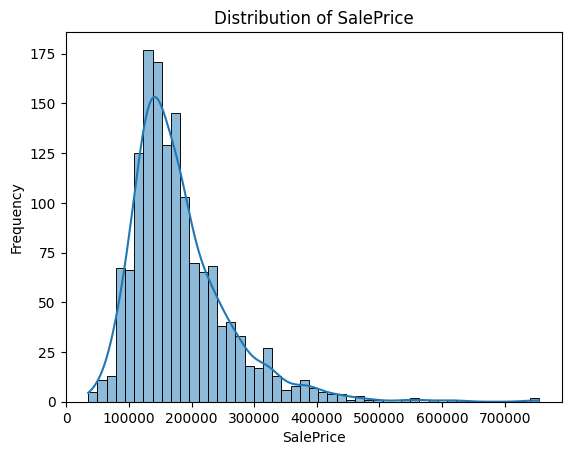

In [7]:
# SalePriceの分布を可視化
sns.histplot(train['SalePrice'],  kde = True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
# 特徴量（説明変数） : GrLivArea(居住面積)
X = train[['GrLivArea']]

# 目的変数（ターゲット）: SalePrice(販売価格)
Y = train[['SalePrice']]

In [10]:
# モデル作成
model = DecisionTreeRegressor(random_state=42)
#42は毎回同じ結果になるおまじない

#モデルに学習させる（fit = 訓練する）
model.fit(X, Y)

DecisionTreeRegressor(random_state=42)

In [11]:
# testデータのGrLivAreaを使って予測
X_test = test[['GrLivArea']]
predictions = model.predict(X_test).flatten()

# 結果を少しだけ表示
print(predictions[:5])

[124236.36363636 140000.         277000.         172666.66666667
 171500.        ]


In [12]:
# Kaggleのスコアが低かったから特徴量を増やす

# 使うカラムを増やす
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea']

# 説明変数目的変数
X = train[features]
Y = train['SalePrice']

# testデータ側も同じ特徴量で取り出す
X_test = test[features]

In [13]:
# 予測結果を提出用のDataFrameにまとめる
submission = pd.DataFrame({
    'Id' : test['Id'],                   #testデータのId列
    'SalePrice' : predictions      #さっき予測した価格
})

# CSVファイルに保存する
submission.to_csv('submission.csv', index = False)

# 作ったsubmissionファイルの先頭5行だけ表示
print(submission.head())

     Id      SalePrice
0  1461  124236.363636
1  1462  140000.000000
2  1463  277000.000000
3  1464  172666.666667
4  1465  171500.000000
